<a href="https://colab.research.google.com/github/pngy87/-PTDLNC-GOOGLE-COLAB/blob/main/%5BCHAPTER%207%5D%206_Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Simple Decision Tree

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Step 1: Create the dataset
data = {
    "Outlook": ["Sunny", "Sunny", "Overcast", "Rainy", "Rainy", "Rainy", "Overcast", "Sunny", "Sunny", "Rainy", "Sunny", "Overcast", "Overcast", "Rainy"],
    "Temperature": ["Hot", "Hot", "Hot", "Mild", "Cool", "Cool", "Cool", "Mild", "Cool", "Mild", "Mild", "Mild", "Hot", "Mild"],
    "Humidity": ["High", "High", "High", "High", "Normal", "Normal", "Normal", "High", "Normal", "Normal", "Normal", "High", "Normal", "High"],
    "Wind": ["Weak", "Strong", "Weak", "Weak", "Weak", "Strong", "Strong", "Weak", "Weak", "Weak", "Strong", "Strong", "Weak", "Strong"],
    "Play Tennis": ["No", "No", "Yes", "Yes", "Yes", "No", "Yes", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "No"]
}

df = pd.DataFrame(data)

In [ ]:

# Step 2: Encode categorical data
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le



In [ ]:
df

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


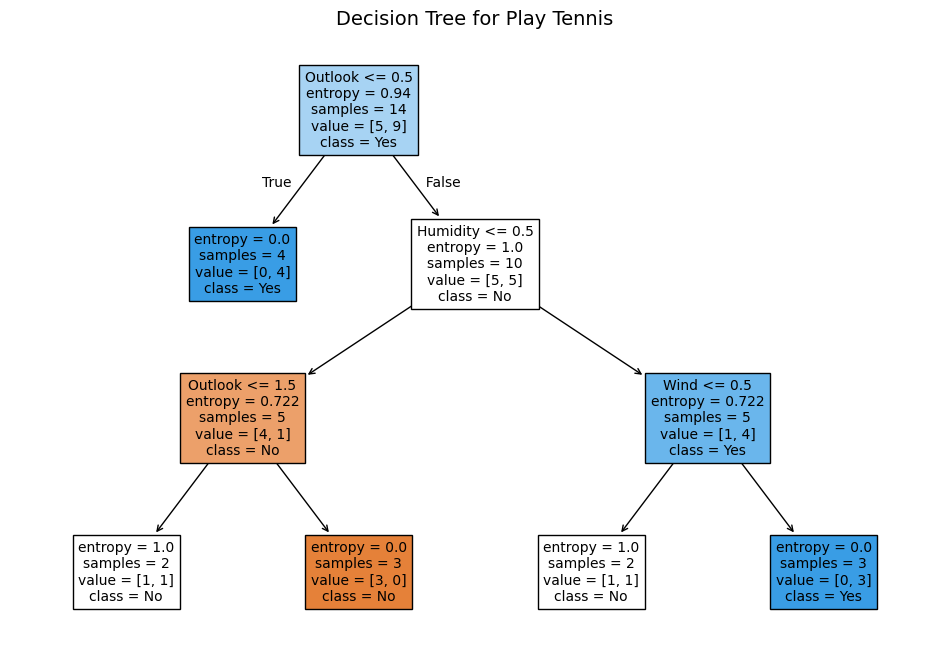

In [ ]:

# Step 3: Separate features and target
X = df[["Outlook", "Temperature", "Humidity", "Wind"]]
y = df["Play Tennis"]

# Step 4: Train the decision tree classifier
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=42)
clf.fit(X, y)

# Step 5: Visualize the decision tree
plt.figure(figsize=(12, 8))  # Set the figure size
plot_tree(
    clf,
    feature_names=["Outlook", "Temperature", "Humidity", "Wind"],  # Feature names
    class_names=label_encoders["Play Tennis"].classes_,  # Class names
    filled=True,  # Fill nodes with colors
    fontsize=10  # Adjust font size for better visibility
)
plt.title("Decision Tree for Play Tennis", fontsize=14)  # Title with adjusted font size
plt.show()



In [ ]:
# Create a DataFrame with the correct feature names
new_data = [[0, 1, 0, 1]]
new_data_df = pd.DataFrame(new_data, columns=["Outlook", "Temperature", "Humidity", "Wind"])

# Predict using the DataFrame
prediction = clf.predict(new_data_df)
print("Prediction for new data:", label_encoders["Play Tennis"].inverse_transform(prediction))


Prediction for new data: ['Yes']


#2. Compare prediction model

In [ ]:
#install dmba package
!pip install dmba

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 102.9 MB/s eta 0:00:00


In [ ]:
# Download UniversalBank.csv data file and save to Colab
!wget https://github.com/DanielTrieu/data_analytic/raw/refs/heads/main/data/UniversalBank.csv


--2025-09-21 08:15:43--  https://github.com/DanielTrieu/data_analytic/raw/refs/heads/main/data/UniversalBank.csv
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/DanielTrieu/data_analytic/refs/heads/main/data/UniversalBank.csv [following]
--2025-09-21 08:15:44--  https://raw.githubusercontent.com/DanielTrieu/data_analytic/refs/heads/main/data/UniversalBank.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205666 (201K) [text/plain]
Saving to: ‘UniversalBank.csv’

UniversalBank.csv   100%[===================>] 200.85K  --.-KB/s    in 0.005s  

2025-09-21 08:15:44 (42.5 MB/s) - ‘UniversalBank.csv

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pylab as plt
import seaborn as sns
from dmba import classificationSummary, gainsChart, liftChart
from dmba.metric import AIC_score
from sklearn.metrics import log_loss

Colab environment detected.


In [ ]:
# Load the dataset
bank_df = pd.read_csv('UniversalBank.csv')

# Drop unnecessary columns
bank_df.drop(columns=['ID', 'ZIP Code'], inplace=True)

# Replace spaces in column names with underscores
bank_df.columns = [c.replace(' ', '_') for c in bank_df.columns]

# Treat 'Education' as a categorical variable and rename its categories
bank_df['Education'] = bank_df['Education'].astype('category')
new_categories = {1: 'Undergrad', 2: 'Graduate', 3: 'Advanced/Professional'}
bank_df['Education'] = bank_df['Education'].cat.rename_categories(new_categories)

# Convert categorical variables to dummy variables (one-hot encoding)
bank_df = pd.get_dummies(bank_df, prefix_sep='_', drop_first=True)

# Define target (y) and features (X)
y = bank_df['PersonalLoan']
X = bank_df.drop(columns=['PersonalLoan'])

# Partition data into training and validation sets
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.2, random_state=1)


In [ ]:
..# prompt: give decision tree for UniversalBank.csv and compute f1 score for training and testing

# Train a decision tree model
dt_model = DecisionTreeClassifier(max_depth=6, random_state=1)
dt_model.fit(train_X, train_y)

# Make predictions on training and validation sets
train_pred = dt_model.predict(train_X)
valid_pred = dt_model.predict(valid_X)

# Evaluate the model using classificationSummary
print("Training Data:")
classificationSummary(train_y, train_pred)

print("\nValidation Data:")
classificationSummary(valid_y, valid_pred)

# Compute and print F1 scores
from sklearn.metrics import f1_score
print("\nF1 Score (Training):", f1_score(train_y, train_pred))
print("F1 Score (Validation):", f1_score(valid_y, valid_pred))

Training Data:
Confusion Matrix (Accuracy 0.9938)

       Prediction
Actual    0    1
     0 3615    5
     1   20  360

Validation Data:
Confusion Matrix (Accuracy 0.9810)

       Prediction
Actual   0   1
     0 896   4
     1  15  85

F1 Score (Training): 0.9664429530201343
F1 Score (Validation): 0.8994708994708994


In [ ]:
# adjust threshold with decision tree

import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Đặt threshold mong muốn
threshold = 0.4  # có thể đổi thành 0.5, 0.6, v.v.

# Training predictions với threshold
train_proba = dt_model.predict_proba(train_X)[:, 1]
train_predictions = (train_proba >= threshold).astype(int)

print(f"Training Metrics @ threshold={threshold}")
print(confusion_matrix(train_y, train_predictions))
print(classification_report(train_y, train_predictions, zero_division=0))

# Validation predictions với threshold
valid_proba = dt_model.predict_proba(valid_X)[:, 1]
valid_predictions = (valid_proba >= threshold).astype(int)

print(f"\nValidation Metrics @ threshold={threshold}")
print(confusion_matrix(valid_y, valid_predictions))
print(classification_report(valid_y, valid_predictions, zero_division=0))

Training Metrics @ threshold=0.4
[[3605   15]
 [ 112  268]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3620
           1       0.95      0.71      0.81       380

    accuracy                           0.97      4000
   macro avg       0.96      0.85      0.90      4000
weighted avg       0.97      0.97      0.97      4000


Validation Metrics @ threshold=0.4
[[896   4]
 [ 28  72]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       900
           1       0.95      0.72      0.82       100

    accuracy                           0.97      1000
   macro avg       0.96      0.86      0.90      1000
weighted avg       0.97      0.97      0.97      1000



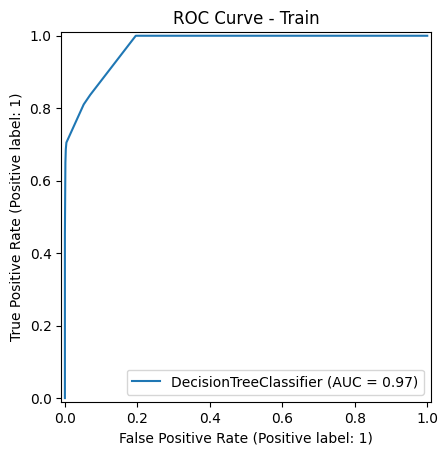

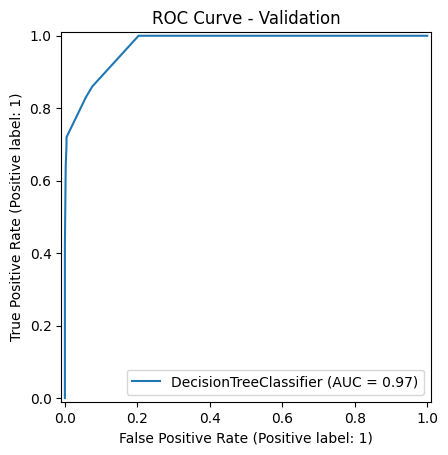

In [ ]:
from sklearn.metrics import RocCurveDisplay

# với tập train
RocCurveDisplay.from_estimator(dt_model, train_X, train_y)
plt.title("ROC Curve - Train")
plt.show()

# với tập validation
RocCurveDisplay.from_estimator(dt_model, valid_X, valid_y)
plt.title("ROC Curve - Validation")
plt.show()
